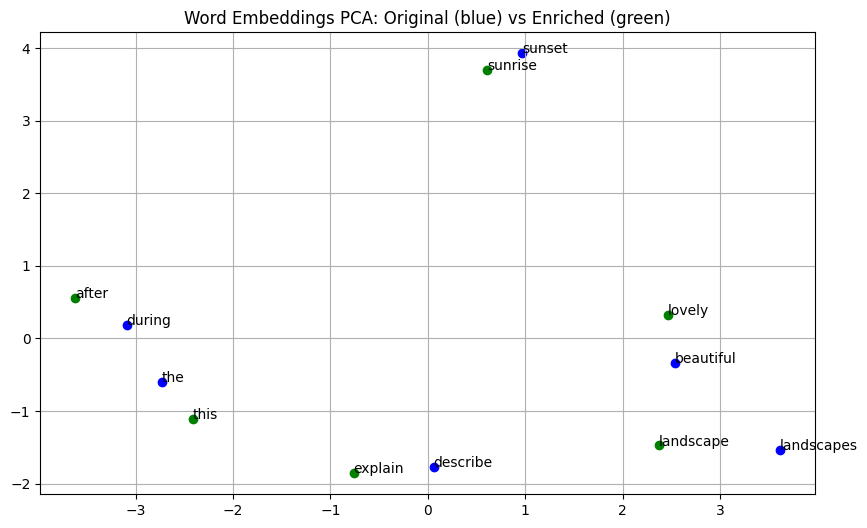

Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



--- Original Prompt ---
Describe the beautiful landscapes during sunset. The landscape is a little unusual in that the trees are usually quite tall and dark and the slopes are very steep. The scenery is very beautiful.


--- Enriched Prompt ---
explain this lovely landscape after sunrise. The beautiful views and the beautiful architecture and the stunning views are what make this place worth visiting.

I have had this place a few times


In [2]:
import gensim.downloader as api
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from transformers import pipeline, set_seed


embedding_model = api.load("glove-wiki-gigaword-100")


original_prompt = "Describe the beautiful landscapes during sunset."


def enrich_prompt(prompt, model, topn=1):
    original_words, enriched_words = [], []
    for word in prompt.split():
        clean = word.lower().strip(".,!?")
        if clean in model:
            original_words.append(clean)
            enriched_words += [w[0] for w in model.most_similar(clean, topn=topn)]
    return original_words, enriched_words

original_words, enriched_words = enrich_prompt(original_prompt, embedding_model)
enriched_prompt = " ".join(enriched_words)

# PCA plot
all_words = original_words + enriched_words
vectors = [embedding_model[word] for word in all_words]
reduced = PCA(n_components=2).fit_transform(vectors)

plt.figure(figsize=(10, 6))
for i, word in enumerate(all_words):
    plt.scatter(reduced[i, 0], reduced[i, 1], color='blue' if word in original_words else 'green')
    plt.annotate(word, (reduced[i, 0], reduced[i, 1]))
plt.title("Word Embeddings PCA: Original (blue) vs Enriched (green)")
plt.grid(True)
plt.show()


generator = pipeline("text-generation", model="gpt2")
set_seed(42)
orig_resp = generator(original_prompt, max_new_tokens=30, truncation=True)[0]['generated_text']
enrich_resp = generator(enriched_prompt, max_new_tokens=30, truncation=True)[0]['generated_text']

print("\n--- Original Prompt ---")
print(orig_resp)

print("\n--- Enriched Prompt ---")
print(enrich_resp)
